# Predição das Notas de Matemática do ENEM 2016
**Por:** Diego Luiz Vieira Domingues.

### Contatos Profissionais: 
- E-mail: [dluiz815@gmail.com](dluiz815@gmail.com)
- LinkedIn: <a href="https://www.linkedin.com/in/diego-luiz-ds/" target="blank">Perfil</a>
- GitHub: [Perfil](https://github.com/Diegohluiz)

<img src="img/logo-enem-2016.png" />

<h1 style="color:blue;">O Problema:</h1>
<h2> Construa um modelo para prever as notas de matemática do ENEM 2016 com base nos dados registrados nos arquivos train.csv e test.csv.</h2>

> Salve sua resposta em um arquivo chamado answer.csv com duas colunas: **NU_INSCRICAO** e **NU_NOTA_MT**.

### Portanto, trata-se de um problema de **Regressão**.

<h1 style="color:blue;">A Base de Dados:</h1>

 O contexto do desafio gira em torno dos resultados do **ENEM 2016** (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna **NU_NOTA_MT**) de quem participou do ENEM 2016.

Os dados, na forma que se encontram nos arquivos train.csv e test.csv, são uma fração dos dados oficiais fornercidos pelo INEP e foram dispoinibilizados pela <a href="https://www.codenation.dev/">Codenation</a>. Portanto, estamos trabalhando com uma amostra dos dados oficiais e todas as conclusões das análises que faremos aqui, serão para este conjunto de dados.

Os dados oficiais do ENEM, de qualquer edição, podem ser econtrados no seguinte link: http://inep.gov.br/web/guest/microdados

<h1 style="color:red;">Observação:</h1>
<h3>Modelo em construção.</h3>

Este é o resultado alcançado com nosso primeiro modelo criado para termos uma baseline a ser batida por novos modelos e(ou) aplicações de outras técnicas como feature selection, feature engineering, ajustes de hiperparâmetros e combinações destas.

***SEU SCORE:*** 93.707571%

<h1 style="color:blue;">Dicionário de dados:</h1>

Todas as features do conjunto de dados que vamos trabalhar aqui possuem sua descrição detalhada no arquivo ***Dicionario_Microdados_Enem_2016***, disponível na pasta dicionario-de-dados.

Dentre as inúmeras features destacamos algumas delas, como:

> - **NU_NOTA_MT**: Nossa variável alvo.
- **TP_ENSINO**: Tipo de instituição que concluiu ou concluirá o Ensino Médio.
- **TP_DEPENDENCIA_ADM_ESC**: Dependência administrativa (Federal, Estadual, Municipal ou Privada).
- **NU_NOTA_LC**: Nota da prova de Linguagens e Códigos.
- **NU_NOTA_CN**: Nota da prova de Ciências da Natureza.
- **NU_NOTA_CH**: Nota da prova de Ciências Humanas.

# Importação das bibliotecas

In [1]:
# Manipulação de Dados e Computação Científica
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Modelagem de dados e Machine Learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

In [107]:
# Algumas Configurações do Matplotlib e Seaborn
%matplotlib inline

plt.rc("figure", figsize=(12, 8))

sns.set(style="darkgrid", palette="Accent")

# Importando os dados de TESTE.

> Decidi começar importando os dados do arquivo de testes para verificar quais são as features que estão disponíveis nessa base. Deste modo, saberemos quais as features poderemos utilizar da base de treino.

- ***Obs. importante***: A variável target (***NU_NOTA_MT***) somente está disponível no arquivo train.csv

In [3]:
# Importtando os dados de Teste
x_test = pd.read_csv("test.csv")
x_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


# Análise Exploratória dos Dados de TESTE

In [4]:
# Algumas informações importantes da composição do nosso DataFrame de teste
x_test.info()
print(f"\nEste conjundo de dados possui {x_test.shape[0]} registros e {x_test.shape[1]} colunas.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            4576 non-null   object 
 1   CO_UF_RESIDENCIA        4576 non-null   int64  
 2   SG_UF_RESIDENCIA        4576 non-null   object 
 3   NU_IDADE                4576 non-null   int64  
 4   TP_SEXO                 4576 non-null   object 
 5   TP_COR_RACA             4576 non-null   int64  
 6   TP_NACIONALIDADE        4576 non-null   int64  
 7   TP_ST_CONCLUSAO         4576 non-null   int64  
 8   TP_ANO_CONCLUIU         4576 non-null   int64  
 9   TP_ESCOLA               4576 non-null   int64  
 10  TP_ENSINO               1480 non-null   float64
 11  IN_TREINEIRO            4576 non-null   int64  
 12  TP_DEPENDENCIA_ADM_ESC  1480 non-null   float64
 13  IN_BAIXA_VISAO          4576 non-null   int64  
 14  IN_CEGUEIRA             4576 non-null   

> Como podemos observar, a nossa base de testes contém **4.576 registros** e possui apenas **47 features** de tipos de dados variados como: ***object*** (texto, nesse caso), ***float*** e ***int***.

## Vamos agora fazer uma análise descritiva dos nossos dados.

In [5]:
x_test.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,1480.000000,4576.000000,1480.000000,...,3442.000000,3377.000000,4576.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000
mean,30.762019,21.542395,2.181163,1.060970,1.791084,2.119537,1.368663,1.182432,0.127404,2.264865,...,529.195264,514.304205,0.604458,1.095943,119.626888,111.915902,106.384365,112.881256,76.683447,527.491857
std,9.912313,6.854073,1.017531,0.281289,0.875692,3.210353,0.568589,0.572495,0.333461,0.716922,...,73.086665,67.725564,0.489020,0.695047,29.028146,33.296849,33.834492,33.202244,42.985637,151.979490
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,479.725000,468.400000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,532.000000,516.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,540.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,579.550000,562.400000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,65.000000,5.000000,4.000000,4.000000,10.000000,3.000000,3.000000,1.000000,4.000000,...,773.600000,708.900000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


### Dentre várias informações da tabela acima, uma em particular é muito interessante e iremos fazer uso da mesma mais a frente:
> Não possuímos **valores negativos** na nossa base de dados de teste, conforme demonstrado abaixo:

In [6]:
(x_test.describe().loc["min"] < 0).sum()

0

# Verificando os dados faltantes
### Vamos verificar, através de um gráfico, os valores faltantes em nossa base de TESTE. Para isso, vamos utilizar o gráfico de barras.

In [7]:
nans_x_test = x_test.isna().sum()
nans_x_test.name = "Base de Testes"

### Definindo uma função para plotar o gráfico dos valores faltantes em nosso data set.

In [8]:
def plota_nulos(nulos, df):
    plt.figure(figsize=(15, 15))
    plt.barh(y=nulos.index, width=nulos.values)
    for indice, valor in enumerate(nulos):
        plt.text(valor + 5, indice - 0.25, "{}%".format(round(valor * 100/ df.shape[0], 0)))
    plt.title("Dados Faltantes por Feature na {}".format(nulos.name), fontsize=25)
    plt.xlabel("Quantidade de Valores Faltantes", fontsize=18)
    plt.ylabel("Features", fontsize=18)
    plt.grid(True)

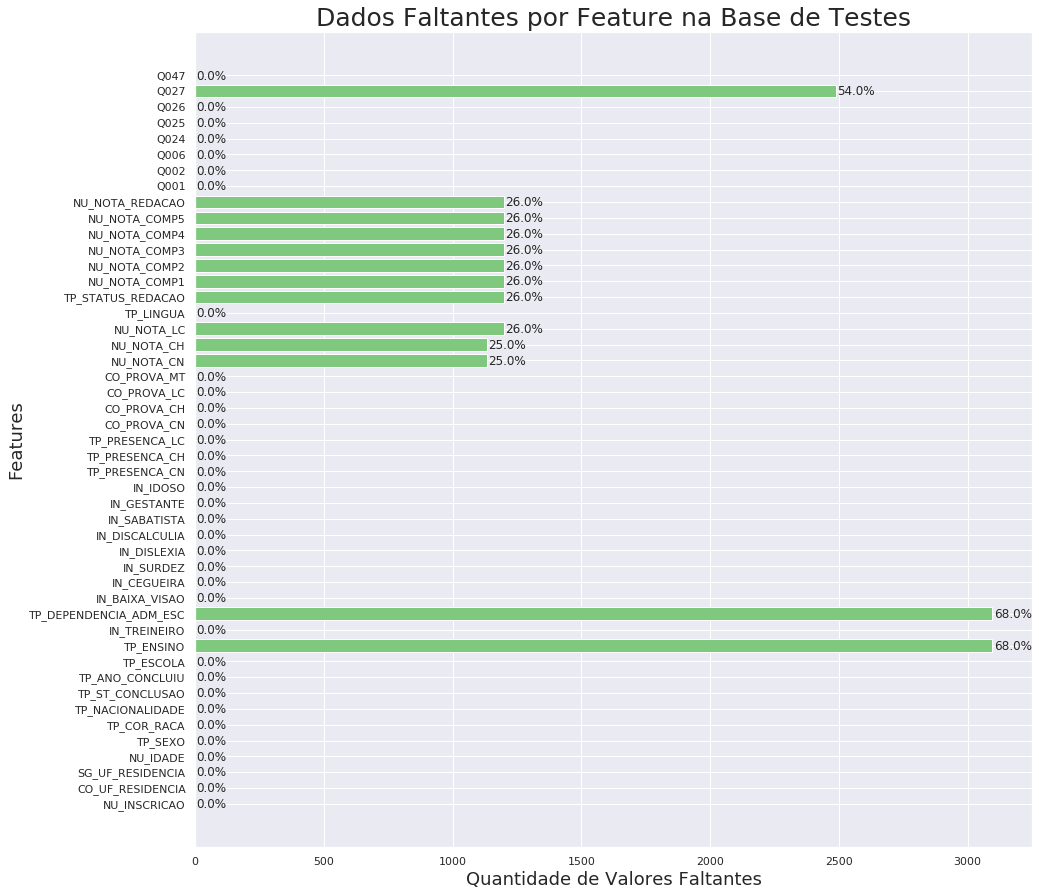

In [9]:
#Plotando o gráfico de valores faltantes
plota_nulos(nans_x_test, x_test)

Como podemos notar pelo gráfico acima, temos muitas features da nossa base de testes com **valores faltantes**.
Algumas chegam ter até **68%** de seus registros vazios, como é o caso das features **TP_ENSINO** e **TP_DEPENDENCIA_AD_ESC**.

# O que fazer com os dados faltantes?
> Este momento é sempre **muito delicado**. Tendo em vista que, **qualquer escolha** que façamos aqui terá **impacto direto** nos **resultados** do nosso modelo.

> Eis aqui algumas **opções** de como tratar estes dados faltantes: 
- **Remover** todos os registros com valores faltantes;
- Substituir todos os esses valores por **zero**;
- Substitituí-los pela **média** ou **mediana** das respectivas features;
- Substituir por alguma forma de interpolação dos dados faltantes;
- Substituir por **(-1)** (Já que este valor está fora do range das nossas variáveis, como foi visto na análise descritiva).

> ### Nossa escolha:
Dentre todas as opções listadas acima, a que decidi utilizar foi a de subtituir os dados faltantes por **(-1)**. A razão para isso se deve, ao fato de termos variáveis explicativas que se relacinam entre sí. Por exemplo: Quem levou fata na prova de Linguagens e Códigos, 



In [10]:
# Preenchendo os valores faltantes por -1.
x_test.fillna(-1, inplace=True)

> Dentre todas as features da base de teste, a única que não iremos utilzar será **NU_INSCRICAO** já que, não possui relevância para nossas predições.

In [11]:
x_test = x_test.drop(columns="NU_INSCRICAO")
x_test

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,41,PR,22,F,3,1,1,5,1,-1.0,...,40.0,420.0,B,A,C,A,A,C,C,A
1,21,MA,26,F,3,1,1,8,1,-1.0,...,100.0,580.0,E,B,C,B,B,B,F,A
2,23,CE,21,M,1,1,2,0,2,3.0,...,80.0,320.0,E,E,D,B,B,A,-1,A
3,15,PA,27,F,3,1,1,8,1,-1.0,...,-1.0,-1.0,H,E,G,B,B,A,-1,A
4,41,PR,18,M,1,1,2,0,2,1.0,...,0.0,320.0,D,H,H,C,B,A,-1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,41,PR,17,F,1,1,2,0,2,1.0,...,40.0,500.0,E,E,D,A,B,A,-1,A
4572,35,SP,17,M,2,1,2,0,2,1.0,...,100.0,520.0,C,C,C,A,A,A,-1,A
4573,35,SP,19,M,1,1,1,2,1,-1.0,...,80.0,640.0,D,F,D,B,B,A,-1,D
4574,52,GO,17,M,2,2,3,0,1,-1.0,...,80.0,520.0,C,E,C,A,A,A,-1,A


In [12]:
# Obtendo o nome das features selecionadas
features = x_test.columns.to_list()
features

['CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']

In [13]:
# Verificando as dimensões do nosso novo Data Frame
x_test.shape

(4576, 46)

# Agora vamos trabalhar com os dados da base de TREINO.
### Importando os dados

In [14]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [15]:
print(f"Registros: {df_train.shape[0]}\nColunas: {df_train.shape[1]}")

Registros: 13730
Colunas: 167


> Como podemos observar, nossa base de dados de treino possui ***13.730 registros*** e ***167 colunas***.

In [16]:
df_train.shape

(13730, 167)


# Análise Exploratória dos Dados de TREINO

### Vamos começar analisando o comportamento da nossa variável alvo (NU_NOTA_MT).

In [17]:
df_train[["NU_NOTA_MT"]].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_MT,10133.0,482.5,99.83,0.0,408.9,461.2,537.6,952.0


> Algumas informações importantes a cerca da nossa variável alvo **NU_NOTA_MT** podem ser obtidas a partir da tabela acima, tais como:
- **Valor mínimo** = 0.0
- **Valor Máximo** = 952.0
- **Média** = 482.5
- **Mediana** = 461.2
- **Desvio Padrão** = 99.83

# Análise Gráfica da Variável Alvo (NU_NOTA_MT)

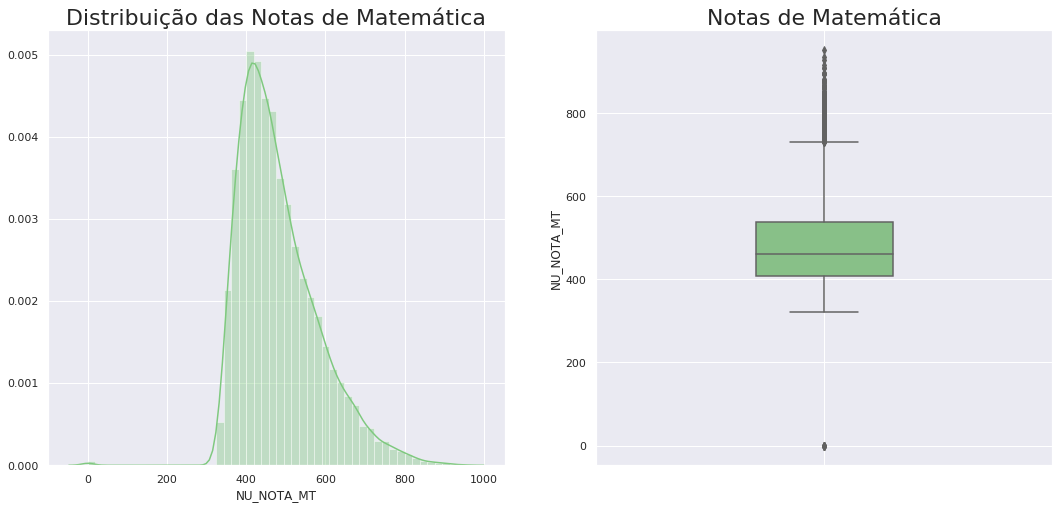

In [18]:
fig, (freq_graph, boxplot_graph) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico da distribuição de frequências da variável NU_NOTA_MT
sns.distplot(df_train["NU_NOTA_MT"], ax=freq_graph, )
freq_graph.set_title("Distribuição das Notas de Matemática", fontsize=22)
freq_graph.grid(True)

# Box Plot da variável NU_NOTA_MT
boxplot_graph = sns.boxplot(y=df_train["NU_NOTA_MT"], width=0.3)
boxplot_graph.set_title("Notas de Matemática", fontsize=22)
boxplot_graph.grid(True)

plt.show()

> Podemos notar a partir dos gráficos acima que, nossa variável alvo possui uma distribuição levemente **assimétrica à direita**, além de possuir valores **outliers** acima de 750 pontos, aproximadamente, que não são valores anômalos. São apenas notas **"acima da média"** e, por isso, serão mantidos. 

> Por outro lado, temos alguns **outliers com nota zero**. Vamos investigar com mais detalhes este caso.


# Candidatos com nota zero
Vamos consultar no nosso Data Frame os candidatos com **nota zero** na prova de **Matemática**.

In [19]:
# Verificando os outliers inferiores no nosso Data Frame.
notas_zero = df_train.query("NU_NOTA_MT == 0")
notas_zero

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
111,112,6698841b20a8b8109a62ad87c39b775f9587acd0,2016,4305108,Caxias do Sul,43,RS,44,F,0.0,...,5.0,A,A,A,C,D,A,D,A,A
429,430,a398ec4cdbfc513d15b7b19893373c1a984e3158,2016,3556453,Vargem Grande Paulista,35,SP,17,F,0.0,...,NaN,C,A,A,A,B,E,A,A,A
3442,3443,f381da30391f67122dae82de6568b27404f75201,2016,2111300,São Luís,21,MA,22,F,0.0,...,NaN,A,A,B,B,A,A,A,B,B
3783,3784,00ad8037ded099646c7cc989151ff84150679593,2016,3550308,São Paulo,35,SP,19,M,0.0,...,NaN,A,A,A,B,A,A,A,A,A
4927,351,75615407a4c9eaaf38ed282d04450bfd7965847b,2016,3527405,Lucélia,35,SP,17,F,0.0,...,NaN,A,A,A,A,B,A,A,A,A
7352,2776,0c00b008a4d943970b88da0a139724652637d474,2016,1502103,Cametá,15,PA,18,F,0.0,...,NaN,A,A,A,A,A,A,A,A,A
7596,3020,10771e954aa01c4b80a943b40bbbd1988d6fe64b,2016,2603454,Camaragibe,26,PE,18,F,0.0,...,5.0,A,A,B,A,B,A,A,B,A
8397,3821,7828f55dcebce807b84c3d130ea6e6c14d43786f,2016,2503407,Cacimba de Areia,25,PB,21,M,0.0,...,NaN,A,A,A,B,B,A,A,A,A
11645,2502,b42cbdfccd92af892e3376ab876ab7ab8faee4c0,2016,2605202,Escada,26,PE,16,M,0.0,...,NaN,A,A,A,A,C,A,A,A,A
13600,4457,81fe4745b22b3a3f9653912c781e4e1f2c52e39e,2016,2507507,João Pessoa,25,PB,23,M,0.0,...,NaN,A,A,A,A,A,A,A,A,D


Como podemos observar acima, temos **10 canditados** que receberam nota **zero**.

Vamos verificar se esses candidatos estiveram presentes na prova de matemática.

Vale lembrar que, a variável **NU_PRESENCA_MT** é do tipo **categórica** e pode assumir um dos tês seguintes valores: 
- 0 -> **Faltou**;
- 1 -> **Presente**;
- 2 -> **Eliminado**;

### Consultando a presença dos candidatos que receberam nota zero, notamos o seguinte:

In [20]:
notas_zero["TP_PRESENCA_MT"]

111      1
429      1
3442     1
3783     1
4927     1
7352     1
7596     1
8397     1
11645    1
13600    1
Name: TP_PRESENCA_MT, dtype: int64

### Um fato curioso ocorre aqui. Todos os 10 candidatos que receberam nota zero estão registrados com **Presença**.

> De acordo com esta <a href="http://download.inep.gov.br/educacao_basica/enem/nota_tecnica/2011/nota_tecnica_tri_enem_18012012.pdf" target="blank">**Nota Técnica**</a> do INEP, **não seria possível** algum candidato tirar **nota zero** nas provas objetivas. 

<img src="img/nota-tecnica-inep.png">

### Porém, investigando um pouco mais sobre este caso, encontramos o seguinte fato em nosso Data Frame.

**Respostas de Matemática** no cartão resposta dos candidatos nota zero:

In [21]:
df_train.query("NU_NOTA_MT == 0")["TX_RESPOSTAS_MT"]

111      .............................................
429      .............................................
3442     .............................................
3783     .............................................
4927     .............................................
7352     .............................................
7596     .............................................
8397     .............................................
11645    .............................................
13600    .............................................
Name: TX_RESPOSTAS_MT, dtype: object

> O **cartão-resposta** de todos os 10 alunos que tiveram **nota zero** em Matemática **não foi preenchido**.
Estes cadidatos não marcaram nehuma opção no cartão-resposta.

### Sendo assim, não vamos considerá-los valores anômalos e os manteremos em nosso data set.

# Candidatos que faltaram

In [22]:
# Pelo dicionário de dados, temos os seguintes valores para a variável  TP_PRESENCA
presenca = {"faltou":0, "presente":1, "eliminado":2}

In [23]:
faltosos = df_train.query(f"TP_PRESENCA_MT == {presenca['faltou']}")

print(f"{faltosos.shape[0]} candidatos recerberam falta na prova de Matemática.")

3592 candidatos recerberam falta na prova de Matemática.


In [24]:
# Notas dos candidatos que faltaram a prova
faltosos["NU_NOTA_MT"]

2       NaN
3       NaN
4       NaN
9       NaN
13      NaN
         ..
13711   NaN
13713   NaN
13715   NaN
13716   NaN
13722   NaN
Name: NU_NOTA_MT, Length: 3592, dtype: float64

 > Parece que **todos os 3.592 cadidatos** que receberam **falta** na prova de **Matemática** não tiveram **nenhuma nota** registrada.

### Vamos verificar a essa hipótese:

In [25]:
faltosos["NU_NOTA_MT"].isna().sum() == faltosos.shape[0]

True

### E o resultado foi exatamente como esperávamos.

> Os **candidatos ausentes** não recebeam qualquer tipo de nota. Com isso, os registros das notas de Matemática para todos eles fica vazio e precisaremos estudar o que fazer com esses registros.

# Cadidatos Eliminados
### Agora, vamos verificar qual a situação das notas de Matemática para os candidatos que foram **ELIMINADOS** da prova.

In [26]:
eliminados = df_train.query(f"TP_PRESENCA_MT == {presenca['eliminado']}")
eliminados["NU_NOTA_MT"]

545    NaN
1304   NaN
6656   NaN
7320   NaN
7690   NaN
Name: NU_NOTA_MT, dtype: float64

### Um todal de apenas **5 candidatos** foram **eliminados** da prova de Matemática. 

> Como se pode notar no resultado acima, os mesmos não tiveram nenhum tipo de nota registrada.

# Panorama Geral  - Faltosos, Eliminados e com Notas Zero.

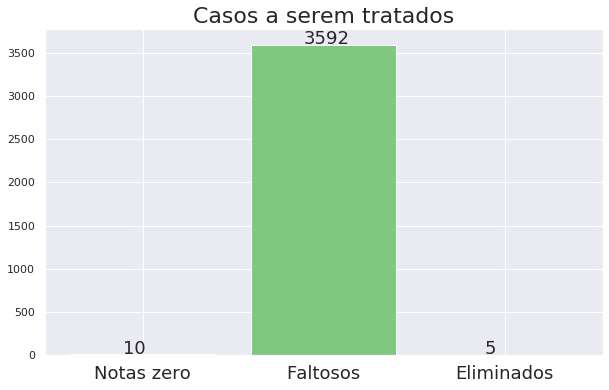

In [27]:
# Gráfico de contagem de notas zero, faltosos e cadidatos eliminados.
plt.figure(figsize=(10, 6))
plt.bar(x=["Notas zero", "Faltosos", "Eliminados"], height=[len(notas_zero), len(faltosos), len(eliminados)])
plt.title("Casos a serem tratados", fontsize=22)
plt.xticks(fontsize=18)

situacoes = (notas_zero, faltosos, eliminados)
for i in range(3):
    plt.annotate(f"{len(situacoes[i])}", (i-0.11, len(situacoes[i])+10), fontsize=18)

plt.grid(True)
plt.show()

> Nota-se claramente que a quantidade de candidatos **faltosos** é imensamente **superior** à quantidade de candidatos que receberam **nota zero** ou foram **eliminados**. E como pudemos verificar, todos os registros da nota de Matemática para estes candidatos estão vazio.

# O que fazer com os outliers e valores faltantes?
- Os 10 candidatos que receberam **nota zero** em Matemática foram registrados com **presença** e não responderam a nenhuma das questões. **Vamos mantê-los**.

- Todos os cadidatos que **faltaram**, ou foram **eliminados**, não receberam qualquer tipo de nota em Matemática. Temos assim um total de **3.597 registros vazios** na nossa variável alvo.  Vamos usar o mesmo tratamento dado aos conjunto teste. Portanto, iremos **imputar (-1)** à todos os valores faltantes nos dados de treino.

# Análise Exploratória das Variáveis Explicativas.

### Vamos limitar o nosso Data Frame de Treino às mesmas variáveis que temos disponíves no nosso data set de Teste mais a nossa variável alvo NU_NOTA_MT.

In [178]:
features[:5]

['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA']

In [29]:
features.append("NU_NOTA_MT")

In [30]:
df_train = df_train[features]
df_train

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,43,RS,24,M,1,1,1,4,1,NaN,...,520.0,D,D,C,A,A,C,H,A,399.4
1,23,CE,17,F,3,1,2,0,2,1.0,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,23,CE,21,F,3,1,3,0,1,NaN,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,33,RJ,25,F,0,1,1,9,1,NaN,...,NaN,H,E,E,C,B,C,F,D,NaN
4,13,AM,28,M,2,1,1,4,1,NaN,...,NaN,E,D,C,A,A,B,F,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,35,SP,20,M,1,1,1,3,1,NaN,...,440.0,E,E,G,B,B,B,C,A,403.2
13726,26,PE,33,F,3,2,1,10,1,NaN,...,560.0,A,A,C,A,B,B,I,A,452.4
13727,43,RS,15,F,1,1,3,0,1,NaN,...,600.0,C,G,B,A,B,A,NaN,A,398.0
13728,33,RJ,36,M,3,1,4,0,1,NaN,...,460.0,B,D,G,B,B,C,E,A,386.6


# Visualização Gráfica dos valores faltantes no data set de TREINO.

> Assim como fizemos para os dados de teste, plotaremos um gráfico de barras usando a **função plota_nulos()** para visualizarmos os **valores faltantes** em nossa base de **treino**.

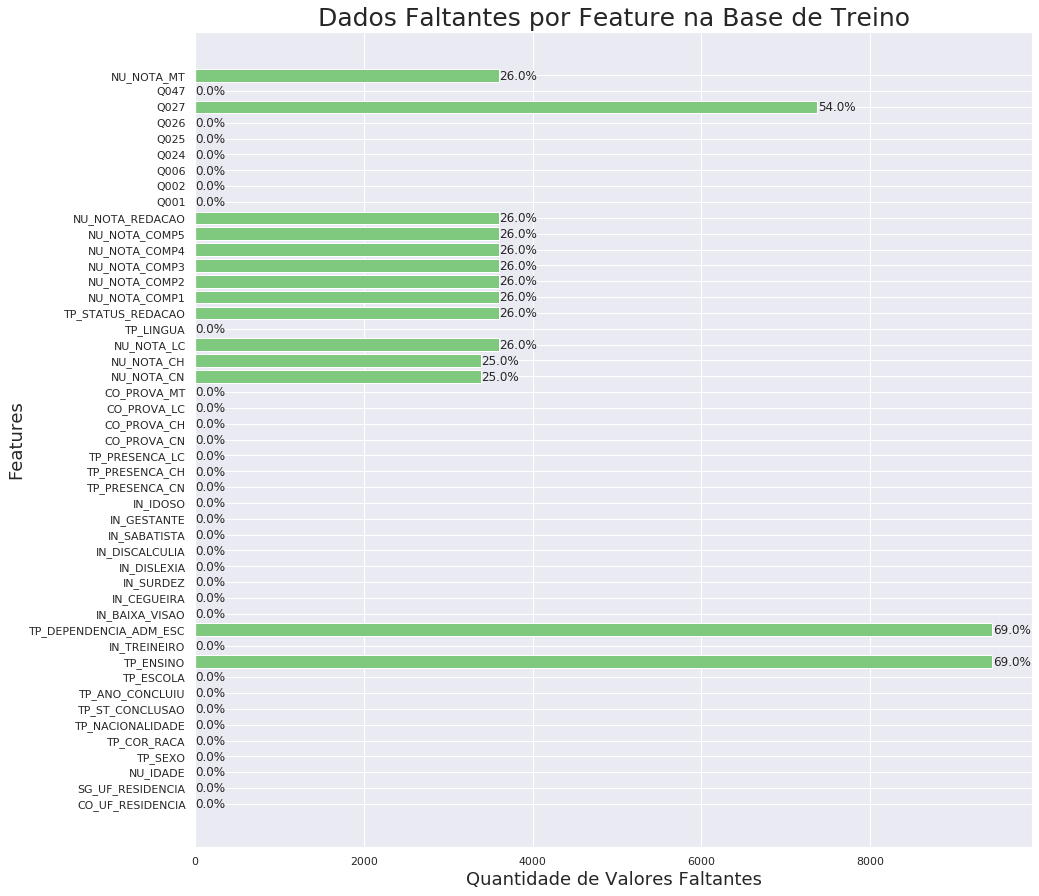

In [31]:
nans_x_train = df_train.isna().sum()
nans_x_train.name = "Base de Treino"

# Plotando o gráfico de valores nulos
plota_nulos(nans_x_train, df_train)

## **Observações importantes** do gráfico acima:
>1. A variável target **(NU_NOTA_MT)** possui **26% de registros faltantes.**
2. As demais variáveis com registros faltantes são exatamente as mesmas do conjunto de dados de teste, como já verificamos por meio do mesmo gráfico. 

> Portanto, vamos proceder da mesma forma como fizemos no conjunto de dados de teste. 

### Vamos **imputar -1** a todos os dados faltantes, mas faremos isso somente ao final da anáslise exploratória dos dados das variáveis explicativas para não alteramos os resultados

In [32]:
# Preenchendo todos os valores faltantes com -1.
#df_train.fillna(-1, inplace=True)

# VARIÁVEIS NUMÉRICAS e VARIÁVEL ALVO.
### Vamos ivestigar se existe alguma realção entre as variáveis numéricas e a variável alvo.

> Notamos que as variáves que tem no início de seu nome alguma das siglas listadas na variável **siglas_categoricas** abaixo, possuem natureza **categórica**. E iremos encoda-las com o **One Hot Encoder** para alimentarmos nossos modelos.

In [42]:
# Separando as features em catergóricas e numéricas
siglas_categoricas = ["CO", "SG", "TP", "IN", "Q0"]

cat_features = [i for i in features if i[:2] in siglas_categoricas]
num_features = df_train.columns.drop(cat_features)

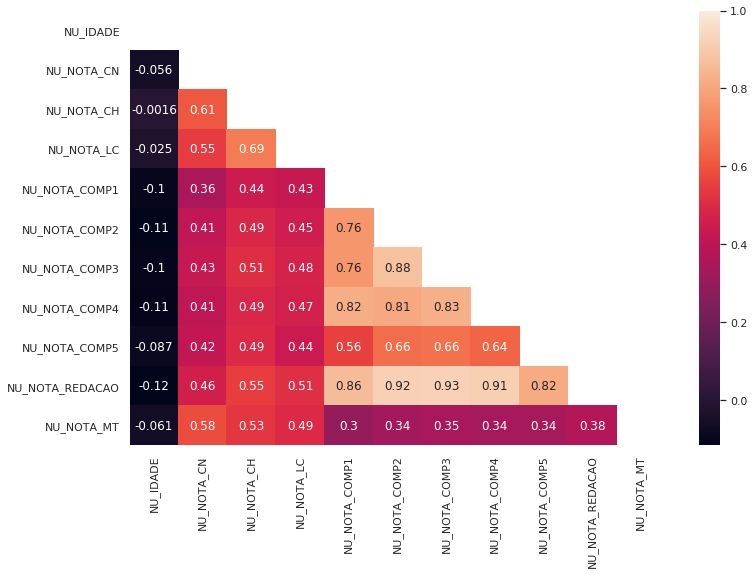

In [35]:
corr = df_train[num_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, annot=True, mask=mask) 

In [43]:
corr[["NU_NOTA_MT"]]

,NU_NOTA_MT
NU_IDADE,-0.061485
NU_NOTA_CN,0.584941
NU_NOTA_CH,0.529594
NU_NOTA_LC,0.494695
NU_NOTA_COMP1,0.299402
NU_NOTA_COMP2,0.335638
NU_NOTA_COMP3,0.350307
NU_NOTA_COMP4,0.342282
NU_NOTA_COMP5,0.343337
NU_NOTA_REDACAO,0.379376


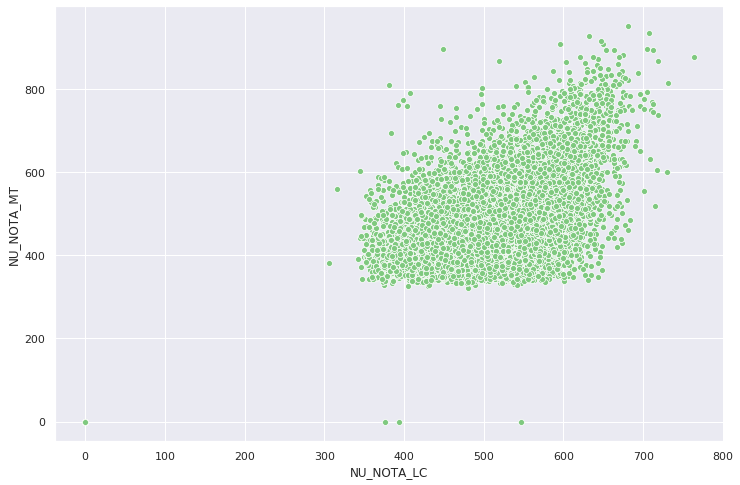

In [57]:
sns.scatterplot(x="NU_NOTA_LC", y="NU_NOTA_MT", data=df_train)
plt.grid(True)

### Correlações entre todas as variáveis númericas

<Figure size 720x576 with 0 Axes>

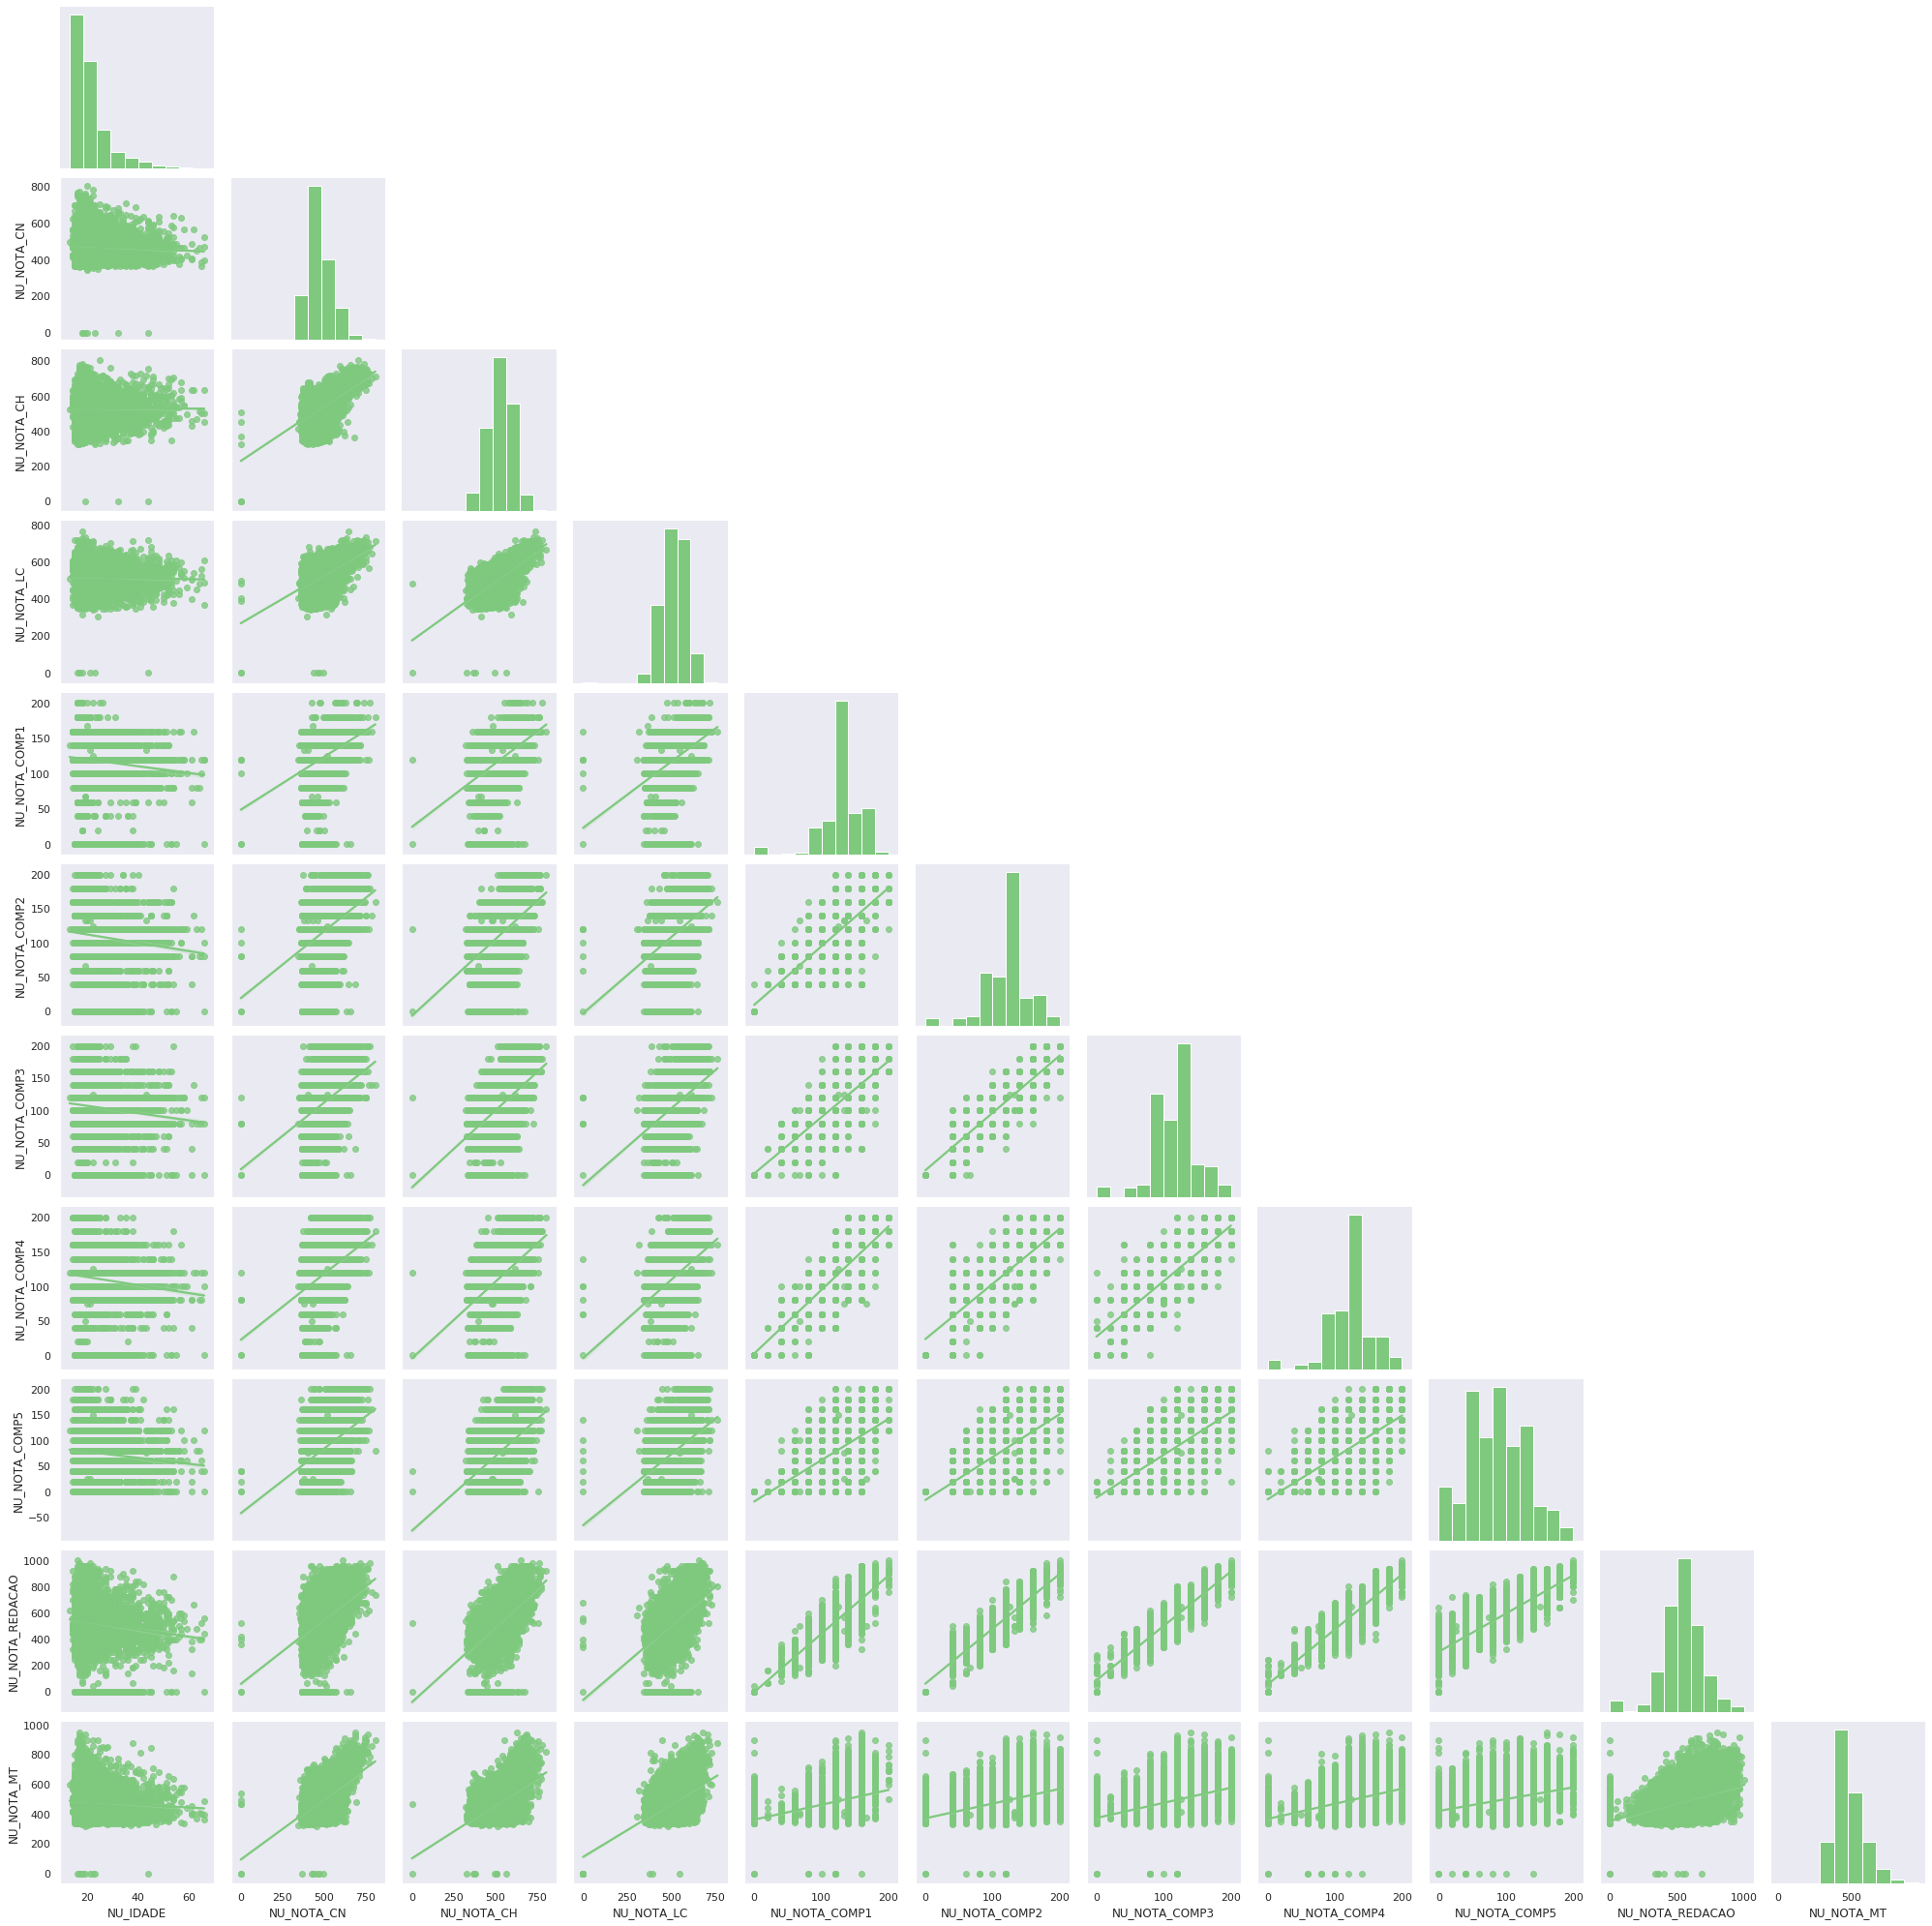

In [58]:
plt.figure(figsize=(10, 8))
sns.pairplot(df_train[num_features], kind="reg", corner=True)
plt.show()

# VARIÁVEIS CATEGÓRICAS e VARIÁVEL ALVO.
### Vamos investigar, por meio de gráficos, se há alguma relação entre nossas variáveis categóricas e nossa variável alvo. 

In [45]:
df_train[cat_features]

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,TP_LINGUA,TP_STATUS_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,43,RS,M,1,1,1,4,1,NaN,0,...,1,1.0,D,D,C,A,A,C,H,A
1,23,CE,F,3,1,2,0,2,1.0,0,...,1,1.0,A,A,B,A,A,A,NaN,A
2,23,CE,F,3,1,3,0,1,NaN,0,...,1,NaN,D,D,C,A,A,A,NaN,A
3,33,RJ,F,0,1,1,9,1,NaN,0,...,0,NaN,H,E,E,C,B,C,F,D
4,13,AM,M,2,1,1,4,1,NaN,0,...,1,NaN,E,D,C,A,A,B,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,35,SP,M,1,1,1,3,1,NaN,0,...,0,1.0,E,E,G,B,B,B,C,A
13726,26,PE,F,3,2,1,10,1,NaN,0,...,1,1.0,A,A,C,A,B,B,I,A
13727,43,RS,F,1,1,3,0,1,NaN,1,...,0,1.0,C,G,B,A,B,A,NaN,A
13728,33,RJ,M,3,1,4,0,1,NaN,0,...,1,1.0,B,D,G,B,B,C,E,A


### Como podemos notar acima, temos 36 variáveis categóricas no nosso conjunto de dados. Iremos exibir aqui algumas delas.
Para isso, iremos definir uma função que irá plotar dois gráficos: Um **Boxplot** e um **Pointplot**. Ambos terão no eixo horizontal as categorias da variável e no eixo vertical a nota de Matemática por categoria da categórica. 

In [167]:
def plota_categorica(feature, labels, title=None, ax_rotation=0):  
    # Criando os dois eixos onde plotaremos nossos gráficos
    fig, (graph_boxplot, graph_pointplot) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Configuração o Boxplot
    sns.boxplot(x=feature.name, y="NU_NOTA_MT", data=df_train, ax=graph_boxplot)
    graph_boxplot.set_title(title, fontsize=20)
    graph_boxplot.set_xticklabels(labels=labels, fontsize=12, rotation=ax_rotation)
    graph_boxplot.grid(True)

    # Configuração do Pointplot
    sns.pointplot(x=feature.name, y="NU_NOTA_MT", data=df_train, ax=graph_pointplot)
    graph_pointplot.set_title("Média por "+title, fontsize=20)
    graph_pointplot.set_xticklabels(labels=labels, fontsize=12, rotation=ax_rotation)
    graph_pointplot.grid(True)

def plota_categorica(feature, label=None, title=None, tipo=None):
    if(tipo == "boxplot"):    
        sns.boxplot(x=feature.name, y="NU_NOTA_MT", data=df_train)
        plt.title(title, fontsize=20)
        plt.xticks(np.arange(len(feature.value_counts())), labels=label)
        plt.grid(True)
        plt.show()
    elif(tipo == "catplot"):
        sns.catplot(x=feature.name, y="NU_NOTA_MT", data=df_train, kind="point", figsize=(12, 8))
        plt.title(title, fontsize=20)
        plt.xticks(np.arange(len(feature.value_counts())), labels=label)
        plt.grid(True)
        plt.show()
    else:
        print("O Tipo de Gráfico não definido!")

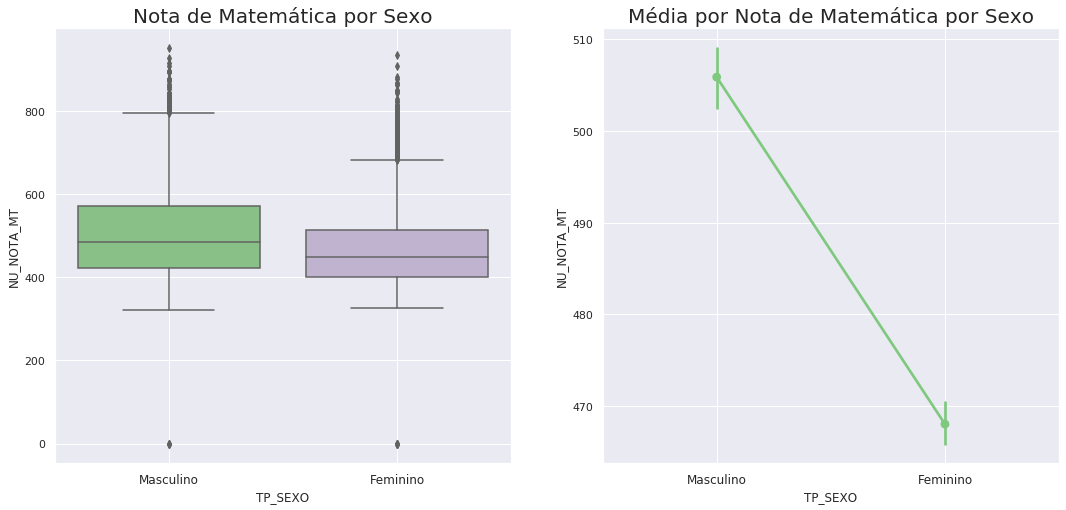

In [168]:
categorias = ("Masculino", "Feminino")
plota_categorica(df_train["TP_SEXO"], labels=categorias, title="Nota de Matemática por Sexo")

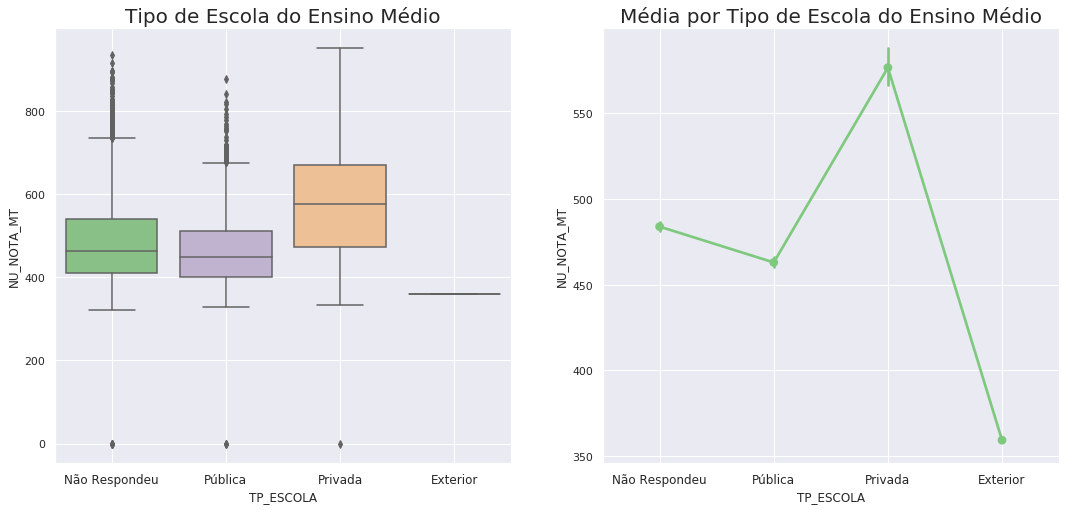

In [138]:
categorias = ("Não Respondeu", "Pública", "Privada", "Exterior")
plota_categorica(df_train["TP_ESCOLA"], labels=categorias, title="Tipo de Escola do Ensino Médio")

In [142]:
df_train.query("TP_ESCOLA == 4")["NU_NOTA_MT"]

1814    359.3
Name: NU_NOTA_MT, dtype: float64

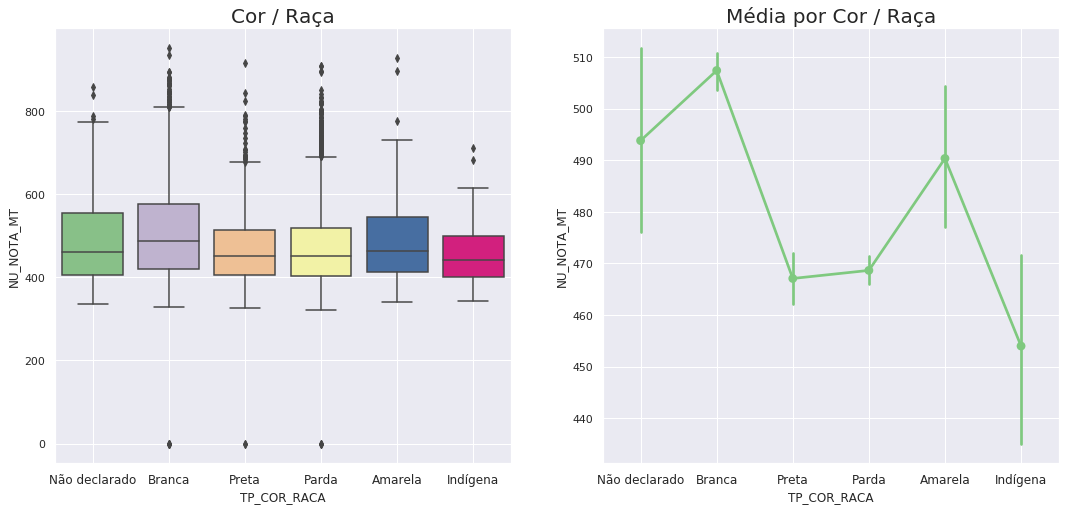

In [143]:
categorias = ("Não declarado", "Branca", "Preta", "Parda", "Amarela", "Indígena")
plota_categorica(df_train["TP_COR_RACA"], labels=categorias, title="Cor / Raça")

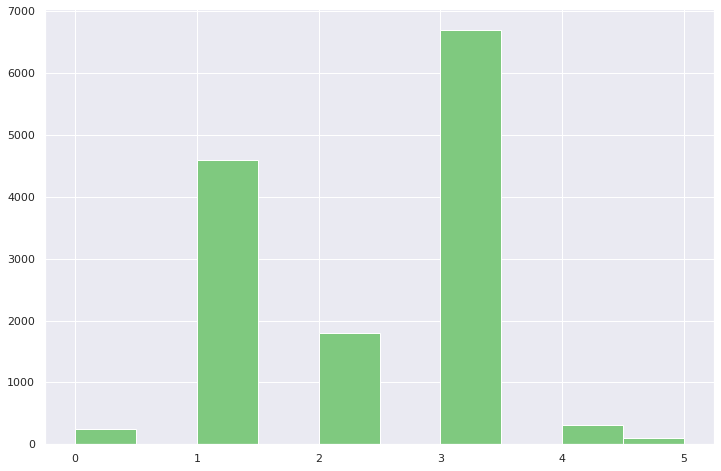

In [179]:
df_train["TP_COR_RACA"].hist()

In [ ]:
categorias = ("Não declarado", "Branca", "Preta", "Parda", "Amarela", "Indígena")
plota_categorica(df_train["IN_GESTANTE"], labels=categorias, title="Cor / Raça")

# Não parece haver relação entre gestante e nota. 

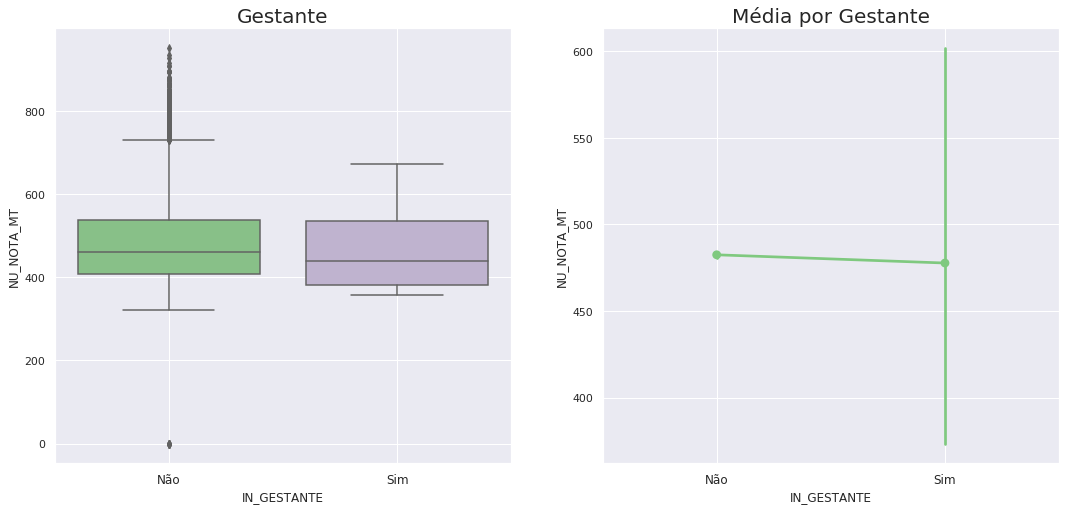

In [145]:
categorias = ("Não", "Sim")
plota_categorica(df_train["IN_GESTANTE"], labels=categorias, title="Gestante")

In [153]:
df_train["IN_GESTANTE"].value_counts()

0    13717
1       13
Name: IN_GESTANTE, dtype: int64

In [156]:
df_train.groupby("IN_GESTANTE")["NU_NOTA_MT"].mean()

IN_GESTANTE
0    482.499803
1    477.750000
Name: NU_NOTA_MT, dtype: float64

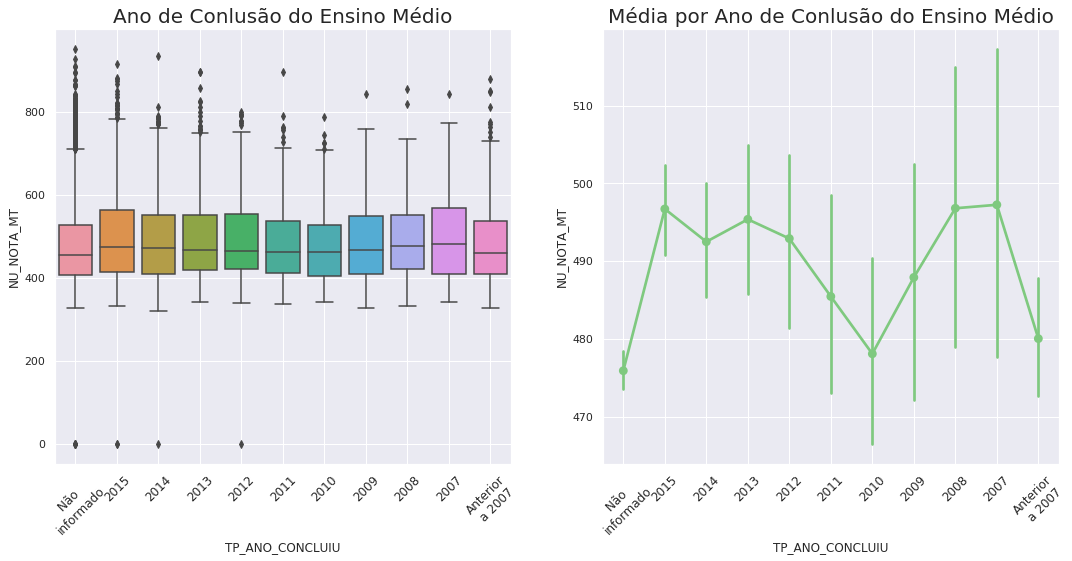

In [170]:
categorias = ("Não \ninformado", 
                        "2015",  
                        "2014",
                        "2013",
                        "2012",
                        "2011",
                        "2010",
                        "2009",
                        "2008",
                        "2007",
                        "Anterior\n a 2007"
                        )
plota_categorica(df_train["TP_ANO_CONCLUIU"], labels=categorias, title="Ano de Conlusão do Ensino Médio",
                ax_rotation=45)

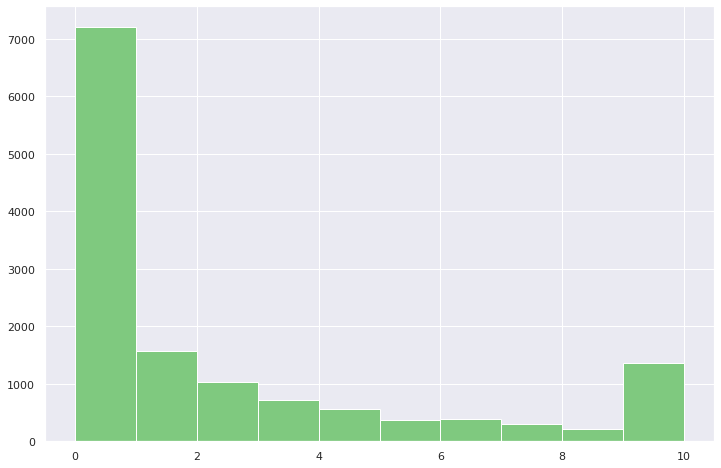

In [151]:
df_train["TP_ANO_CONCLUIU"].hist()

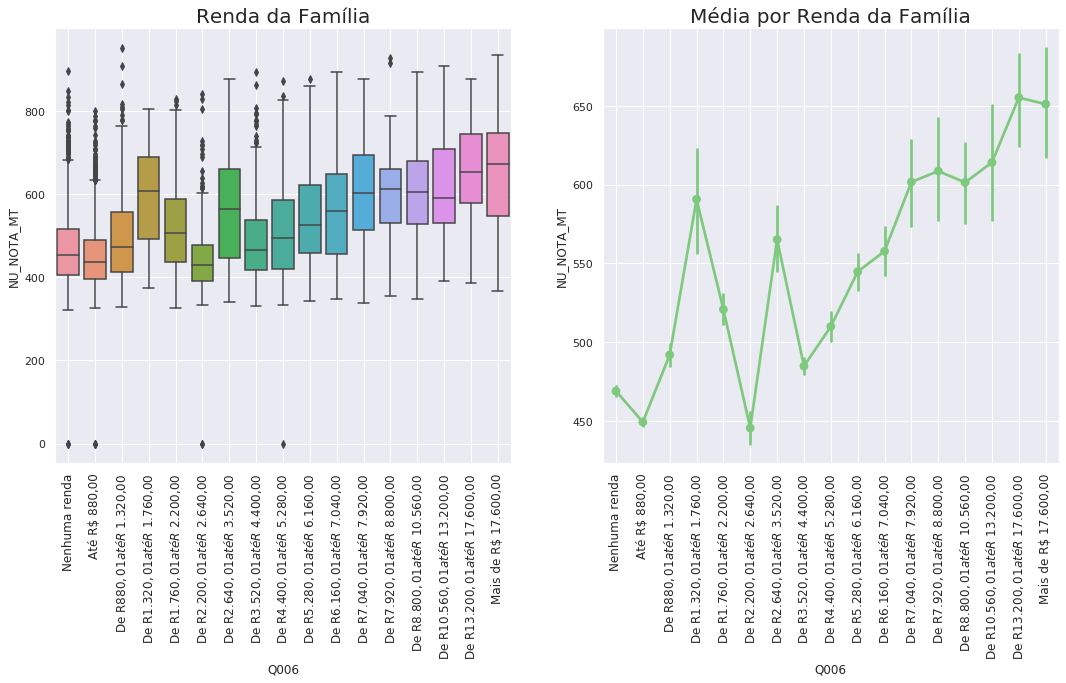

In [177]:
categorias = ("Nenhuma renda",
                "Até R$ 880,00",
                "De R$ 880,01 até R$ 1.320,00",
                "De R$ 1.320,01 até R$ 1.760,00",
                "De R$ 1.760,01 até R$ 2.200,00",
                "De R$ 2.200,01 até R$ 2.640,00",
                "De R$ 2.640,01 até R$ 3.520,00",
                "De R$ 3.520,01 até R$ 4.400,00",
                "De R$ 4.400,01 até R$ 5.280,00",
                "De R$ 5.280,01 até R$ 6.160,00",
                "De R$ 6.160,01 até R$ 7.040,00",
                "De R$ 7.040,01 até R$ 7.920,00",
                "De R$ 7.920,01 até R$ 8.800,00",
                "De R$ 8.800,01 até R$ 10.560,00",
                "De R$ 10.560,01 até R$ 13.200,00",
                "De R$ 13.200,01 até R$ 17.600,00",
                "Mais de R$ 17.600,00")

plota_categorica(df_train["Q006"], labels=categorias, title="Renda da Família", ax_rotation=90)

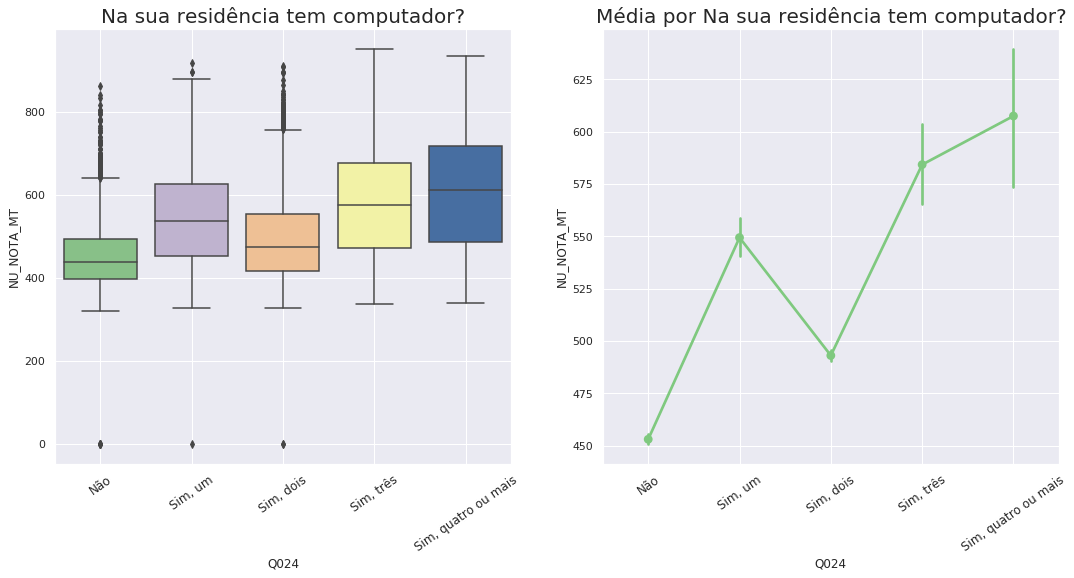

In [189]:
categorias = ("Não",
                "Sim, um",
                "Sim, dois",
                "Sim, três",
                "Sim, quatro ou mais"
)

plota_categorica(df_train["Q024"], labels=categorias, title="Na sua residência tem computador?", ax_rotation=35)

In [193]:
df_train.query("Q024 == 'E'")["Q006"].value_counts()

Q    18
P    14
H     9
O     9
I     6
D     6
E     6
K     5
C     4
N     4
M     4
G     4
J     3
L     2
F     2
B     1
Name: Q006, dtype: int64

In [ ]:
plota_categorica(df_train["Q026"], title="Exerce ou Já Exerceu Atividade Remunerada")

# Vamos agora separar as variáveis explicativas da variável que desejamos explicar (NU_NOTA_MT)

In [ ]:
x_train  = df_train.drop(columns="NU_NOTA_MT")
y_train  = df_train["NU_NOTA_MT"]

In [ ]:
x_train.head()

In [ ]:
y_train.head()

# Modelagem dos dados
## Tratando as variáveis categóricas com o One Hot Encoder.

Nosso Data Frame de Treino listando apenas as variáveis categóricas.

In [ ]:
x_train[cat_features].head()

In [ ]:
x_train.shape

### Encodando variáveis categóricas com o One Hot Encoder.

In [ ]:
x_train_cat = x_train[cat_features].astype(str)

ohe = OneHotEncoder(sparse=False, handle_unknown="ignore", dtype=np.int)
ohe.fit(x_train_cat)
x_train_encoded = ohe.transform(x_train_cat)

In [ ]:
x_train_encoded

In [ ]:
# Criando dataframe com as features categóricas encodadas
cat_features_encoded = pd.DataFrame(x_train_encoded, columns=ohe.get_feature_names(cat_features))
cat_features_encoded

### Montando o Data Frame de TREINO final. 
Cocatenando o dataframe das features categóricas com as numéricas.

In [ ]:
x_train = pd.concat([cat_features_encoded, x_train[num_features].reset_index(drop=True)], axis=1)
x_train

In [ ]:
x_train.isna().sum().sum()

### Precisamos executar a mesma transformação nos dados de Teste.

In [ ]:
# Aplicando o transform nos dados de teste
x_test_encoded = ohe.transform(x_test[cat_features].astype(str))

In [ ]:
# Criando um Data Frame auxiliar contendo apenas as variáveis categóricas do conjunto de Teste.
x_test_encoded = pd.DataFrame(x_test_encoded, columns=ohe.get_feature_names(x_test[cat_features].columns))

In [ ]:
# Visualizando as 5 primeiras linhas desse Data Frame auxiliar.
x_test_encoded.head()

### Montando o Data Frame final do arquivo de testes

In [ ]:
pd.concat([x_test_encoded, x_test[num_features]], axis=1)

In [ ]:
x_test = pd.concat([x_test_encoded, x_test[num_features]], axis=1)
x_test

# Criando e treinando nosso modelo de Machine Learning.
**Modelo:** Decision Tree

Instanciando o modelo e treinando o mesmo.

In [ ]:
clf_dt = DecisionTreeRegressor()
clf_dt.fit(x_train, y_train)

### Capturando as previsões da Decision Tree

In [ ]:
predict_dt = clf_dt.predict(x_test)
predict_dt = pd.Series(predict_dt , name="NU_NOTA_MT")
predict_dt

# Salvando as predições do modelo no arquivo answer.csv para submeter na plataforma da Codenation.

In [ ]:
df = pd.read_csv("test.csv")["NU_INSCRICAO"]
answer = pd.concat([df, predict_dt], axis=1)
answer.to_csv("resultados/decision-tree/answer.csv", index=False)
answer.head(10)

> Com esta **Decision Tree** conseguimos um **Score** de **91.5075%** reportado pela platforma.

# Tentando um outro modelo: Random Forest

Instaciando e Treinando uma Random Forest

In [ ]:
clf_rf = RandomForestRegressor(random_state=42)
clf_rf.fit(x_train, y_train)

predict_rf = clf_rf.predict(x_test)
predict_rf = pd.Series(predict_rf , name="NU_NOTA_MT")

### Salvando os resultados das predições da Random Forest no arquivo answer.csv para submeter ao teste na plaforma.

In [ ]:
df = pd.read_csv("test.csv")[["NU_INSCRICAO"]]
answer = pd.concat([df, predict_rf], axis=1)
answer.to_csv("resultados/Random-forest/answer.csv", index=False)
answer.head()

> Com a **Random Forest** conseguimos um **Score** de **93.7075%** reportado pela plataforma.

> segunda vez deu 93.719243 %

# Conclusão:
Obtivemos um score relativamente elevado com nosso dois modelos, principalmente com a Random Forest.
Vale lembrar que não trabalhamos com nenhuma técnica de feature engineering, seleção de variáves, ajustes nos hiperparâmteros dos modelos e fizemos a imputação dos valores faltantes por -1. 

Nosso primeiro modelo realmente é muito simples, mas já nos deu um resultado interessante.

Ainda há muito o que pode ser feito visando melhorar a qualidade da nossa solução. 

# ExtraTree

In [ ]:
clf_et = ExtraTreesRegressor()
clf_et.fit(x_train, y_train)

predict_et = clf_et.predict(x_test)
predict_et = pd.Series(predict_et , name="NU_NOTA_MT")

df = pd.read_csv("test.csv")[["NU_INSCRICAO"]]
answer = pd.concat([df, predict_et], axis=1)
answer.to_csv("resultados/extratree/answer.csv", index=False)
answer.head()

Score: 93.6749 %

# XGBOOST

In [ ]:
xg = XGBRegressor()
xg.fit(x_train, y_train)

predict_xg = xg.predict(x_test)
predict_xg = pd.Series(predict_xg , name="NU_NOTA_MT")

df = pd.read_csv("test.csv")[["NU_INSCRICAO"]]
answer = pd.concat([df, predict_xg], axis=1)
answer.to_csv("resultados/XGboost/answer.csv", index=False)
answer.head()

In [ ]:
from sklearn.svm import LinearSVR

svr = LinearSVR()
svr.fit(x_train, y_train)

predict_svr = svr.predict(x_test)
predict_svr = pd.Series(predict_svr , name="NU_NOTA_MT")

df = pd.read_csv("test.csv")[["NU_INSCRICAO"]]
answer = pd.concat([df, predict_svr], axis=1)
answer.to_csv("resultados/SVR/answer.csv", index=False)
answer.head()

Score: 93.54037 %

In [ ]:
sns.distplot(y_train, kde=False)

In [ ]:
(y_train == -1).sum()

In [ ]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(clf_rf, x_train, y_train, cv=3)
predictions

In [ ]:
df = pd.read_csv("answer.csv")
df.head()

In [ ]:
df.query("NU_NOTA_MT < 350")

In [ ]:
df = df.query("NU_NOTA_MT > 0")
dfto_csv("answer.csv", index=False)
answer.head()

In [ ]:
sns.distplot(y_train)

# Referênias:
- 
- 